# Classification with Logistic Regression


In [25]:
# ------ Imports ------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# ------ Data-preprocessing ------
df = pd.read_csv('data/processed/cleaned_full.csv')
columns = ['budget', 'revenue']
df_clean = df.dropna(subset=columns)
df_clean = df_clean[(df_clean['budget'] > 0) & (df_clean['revenue'] > 0)]
# print(df_clean.shape)

# The proxy for "success" is revenue > 2 * budget -> translates to 1 or 0
# Not using mask, bc with np.where() I can translate to 1/0 on the fly
df_clean['success'] = np.where(df_clean['revenue'] > 2 * df_clean['budget'], 1, 0)

X = df_clean[['budget']]
y = df_clean['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_test[y_test == 0].size)

243


In [27]:
# ------ Logistic Regression: Fitting ------

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


Accuracy: 0.5606
Precision: 0.5606
F1-Score: 0.7184
[[  0 243]
 [  0 310]]


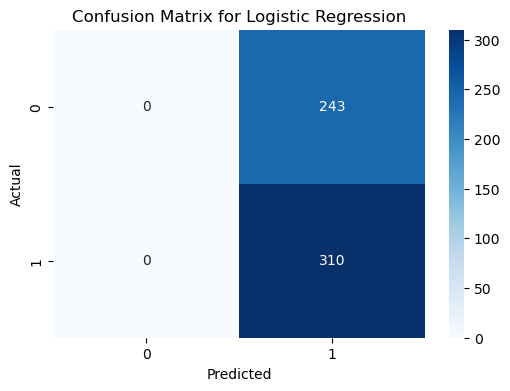

In [28]:
# ------ Logistic Regression: Evaluation ------

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()